In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_s_curve
import torch

shape of moons:  (10000, 2)


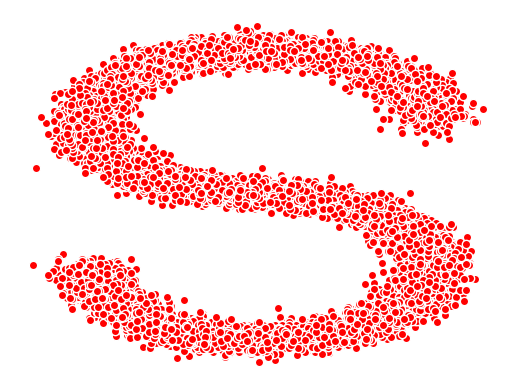

In [2]:
s_curve, _ = make_s_curve(10**4, noise=0.1)
s_curve = s_curve[:, [0, 2]] / 10.0

print("shape of moons: ", np.shape(s_curve))

data = s_curve.T

fig, ax = plt.subplots()
ax.scatter(*data, color='red', edgecolors='white')

ax.axis('off')

dataset = torch.Tensor(s_curve).float()

## 2. 确定超参数的值

In [3]:
num_steps = 100 # 对于步骤，一开始可以由beta、分布的均值和标准差来共同确定

# 制作每一步的beta
betas = torch.linspace(-6, 6, num_steps)
betas = torch.sigmoid(betas) * (0.5e-2 - 1e-5) + 1e-5

# 计算alpha、 alpha_prod、 alpha_prod_previous、 alpha_bar_sqrt等变量的值
alphas = 1 - betas
alphas_prod = torch.cumprod(alphas, 0)
alphas_prod_p = torch.cat([torch.tensor([1]).float(), alphas_prod[:-1]], 0) # previous

alphas_bar_sqrt = torch.sqrt(alphas_prod)

one_minus_alpha_bar_log = torch.log(1 - alphas_prod)
one_minus_alpha_bar_sqrt = torch.sqrt(1 - alphas_prod)

assert alphas.shape == alphas_prod.shape == alphas_prod_p.shape == alphas_bar_sqrt.shape == one_minus_alpha_bar_log.shape == one_minus_alpha_bar_sqrt.shape

print("all the same shape: ", betas.shape)

all the same shape:  torch.Size([100])
